In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



Importing the data set

In [ ]:
anz=pd.read_excel('/content/sample_data/ANZ_dataset.xlsx')
anz.head()

BadZipFile: ignored

checking for the data size

In [ ]:
anz.shape

(12043, 23)

data information

In [ ]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

cheching for null values

In [ ]:
anz.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [ ]:
anz['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [ ]:
anz['bpay_biller_code'].value_counts()

0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64

In [ ]:
anz['merchant_id'].value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
5c011d61-fbbe-437f-9ffa-3d9910cd2c7a     1
9eff6ea8-061d-4e88-93a5-6711962d80ed     1
7747bd2b-e29e-486f-b6aa-ad20ec5f6971     1
a851a118-cfad-4232-8dec-f528125fc2a1     1
e5975ab4-08f7-4725-a369-24cc0e35ed6e     1
Name: merchant_id, Length: 5725, dtype: int64

In [ ]:
anz['merchant_code'].value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [ ]:
anz['merchant_suburb'].value_counts()

Melbourne            255
Sydney               233
Southport             82
Brisbane City         79
Chatswood             55
                    ... 
Cowell                 1
Tweed Heads South      1
Ballandean             1
Sydenham               1
Kings Park             1
Name: merchant_suburb, Length: 1609, dtype: int64

In [ ]:
anz['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [ ]:
anz['card_present_flag']=anz['card_present_flag'].fillna(value=1)
anz['card_present_flag']

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
12038    0.0
12039    1.0
12040    1.0
12041    1.0
12042    1.0
Name: card_present_flag, Length: 12043, dtype: float64

In [ ]:
anz['merchant_code']=anz['merchant_code'].fillna(value=0)
anz['merchant_code']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12038    0.0
12039    0.0
12040    0.0
12041    0.0
12042    0.0
Name: merchant_code, Length: 12043, dtype: float64

In [ ]:
anz['bpay_biller_code']=anz['bpay_biller_code'].fillna(value=0)
anz['bpay_biller_code']

0        0
1        0
2        0
3        0
4        0
        ..
12038    0
12039    0
12040    0
12041    0
12042    0
Name: bpay_biller_code, Length: 12043, dtype: object

total average transaction amount

In [ ]:
#total average transaction amount
print('the mean/average amount is:')
print(anz['amount'].mean())

the mean/average amount is:
187.93358797641784


The average transaction amount daily

In [ ]:
#the average transaction amount daily
print('the average transactions per day')
Amountd=anz.groupby('date').amount.mean()
Amountd


the average transactions per day


date
2018-08-01    218.014161
2018-08-02    143.331053
2018-08-03    242.653376
2018-08-04     53.356356
2018-08-05     44.265000
                 ...    
2018-10-27     50.155252
2018-10-28     59.007762
2018-10-29    377.932745
2018-10-30    247.891461
2018-10-31    155.795248
Name: amount, Length: 91, dtype: float64

In [ ]:
amountd=Amountd.to_frame().reset_index()
amountd

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000
...,...,...
86,2018-10-27,50.155252
87,2018-10-28,59.007762
88,2018-10-29,377.932745
89,2018-10-30,247.891461


In [ ]:
fig=px.line(amountd, x='date', y='amount', title='average amount of daily transactions')
fig.show()

In [ ]:
daily=anz.groupby('date').amount.mean()

Date with the highest and lowest number of transactions

In [ ]:
#Date with the highest and lowest number of transactions
Amountc=anz.groupby('date').amount.count()
Amountc.to_frame().sort_values('amount', ascending=False)

,amount
date,
2018-09-28,174
2018-08-17,172
2018-10-05,168
2018-10-17,162
2018-09-14,161
...,...
2018-08-06,99
2018-08-20,97
2018-10-23,96


In [ ]:
anz['month']=anz['date'].dt.month_name()
anz['month']

0         August
1         August
2         August
3         August
4         August
          ...   
12038    October
12039    October
12040    October
12041    October
12042    October
Name: month, Length: 12043, dtype: object

The average transactions made by customers monthly

In [ ]:
#Average transaction amount made by customers monthly
print('the average transactions made by customers monthly')
print(anz.groupby('month').amount.mean())

the average transactions made by customers monthly
month
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


total number of transactions carried out monthly

In [ ]:
anz['monthly']=anz['date'].dt.month_name()
anz['monthly'].to_frame()


,monthly
0,August
1,August
2,August
3,August
4,August
...,...
12038,October
12039,October
12040,October
12041,October


In [ ]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,monthly
0,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,August,August
1,authorized,0.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,0.0,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,August,August
2,authorized,1.0,0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,August,August
3,authorized,1.0,0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,August,August
4,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,August,August


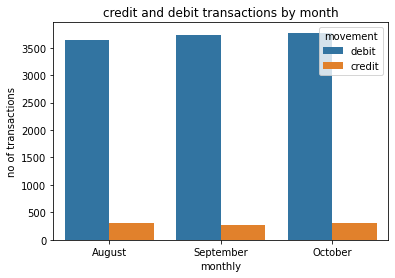

In [ ]:
#credit and debit transactions by month
sns.countplot(data = anz, x='monthly', hue='movement') 
plt.ylabel('no of transactions')
plt.title('credit and debit transactions by month')
plt.show()

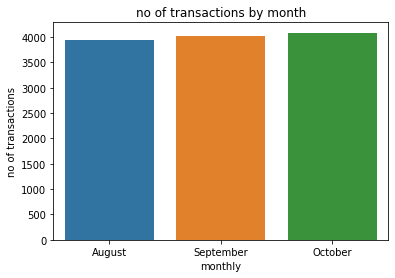

In [ ]:
#No of transaction by month
sns.countplot(data = anz, x='monthly') 
plt.ylabel('no of transactions')
plt.title('no of transactions by month')
plt.show()

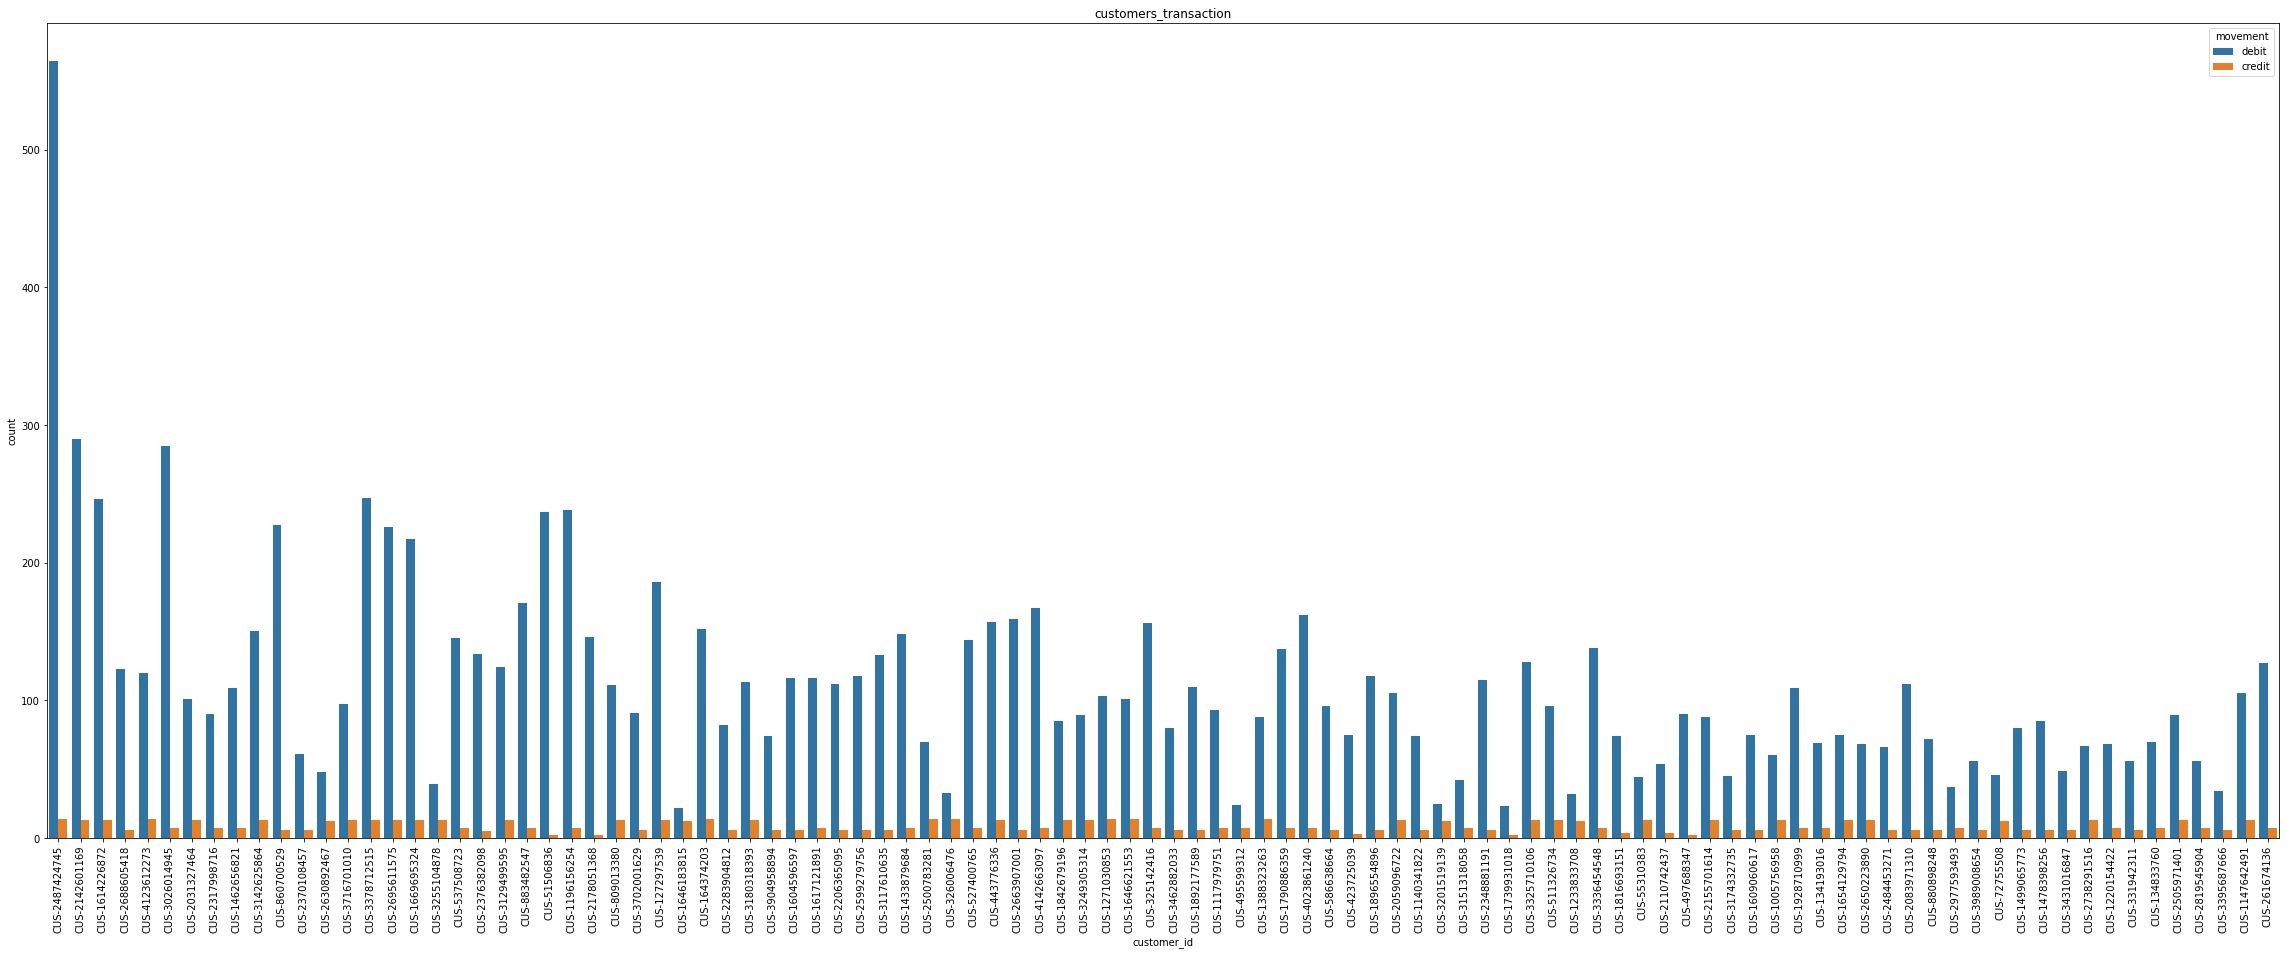

In [ ]:
plt.figure(figsize=(40,15))
sns.countplot(data = anz, x='customer_id', hue='movement' ) 
plt.xticks(rotation=90)
plt.title('customers_transaction')
plt.show()

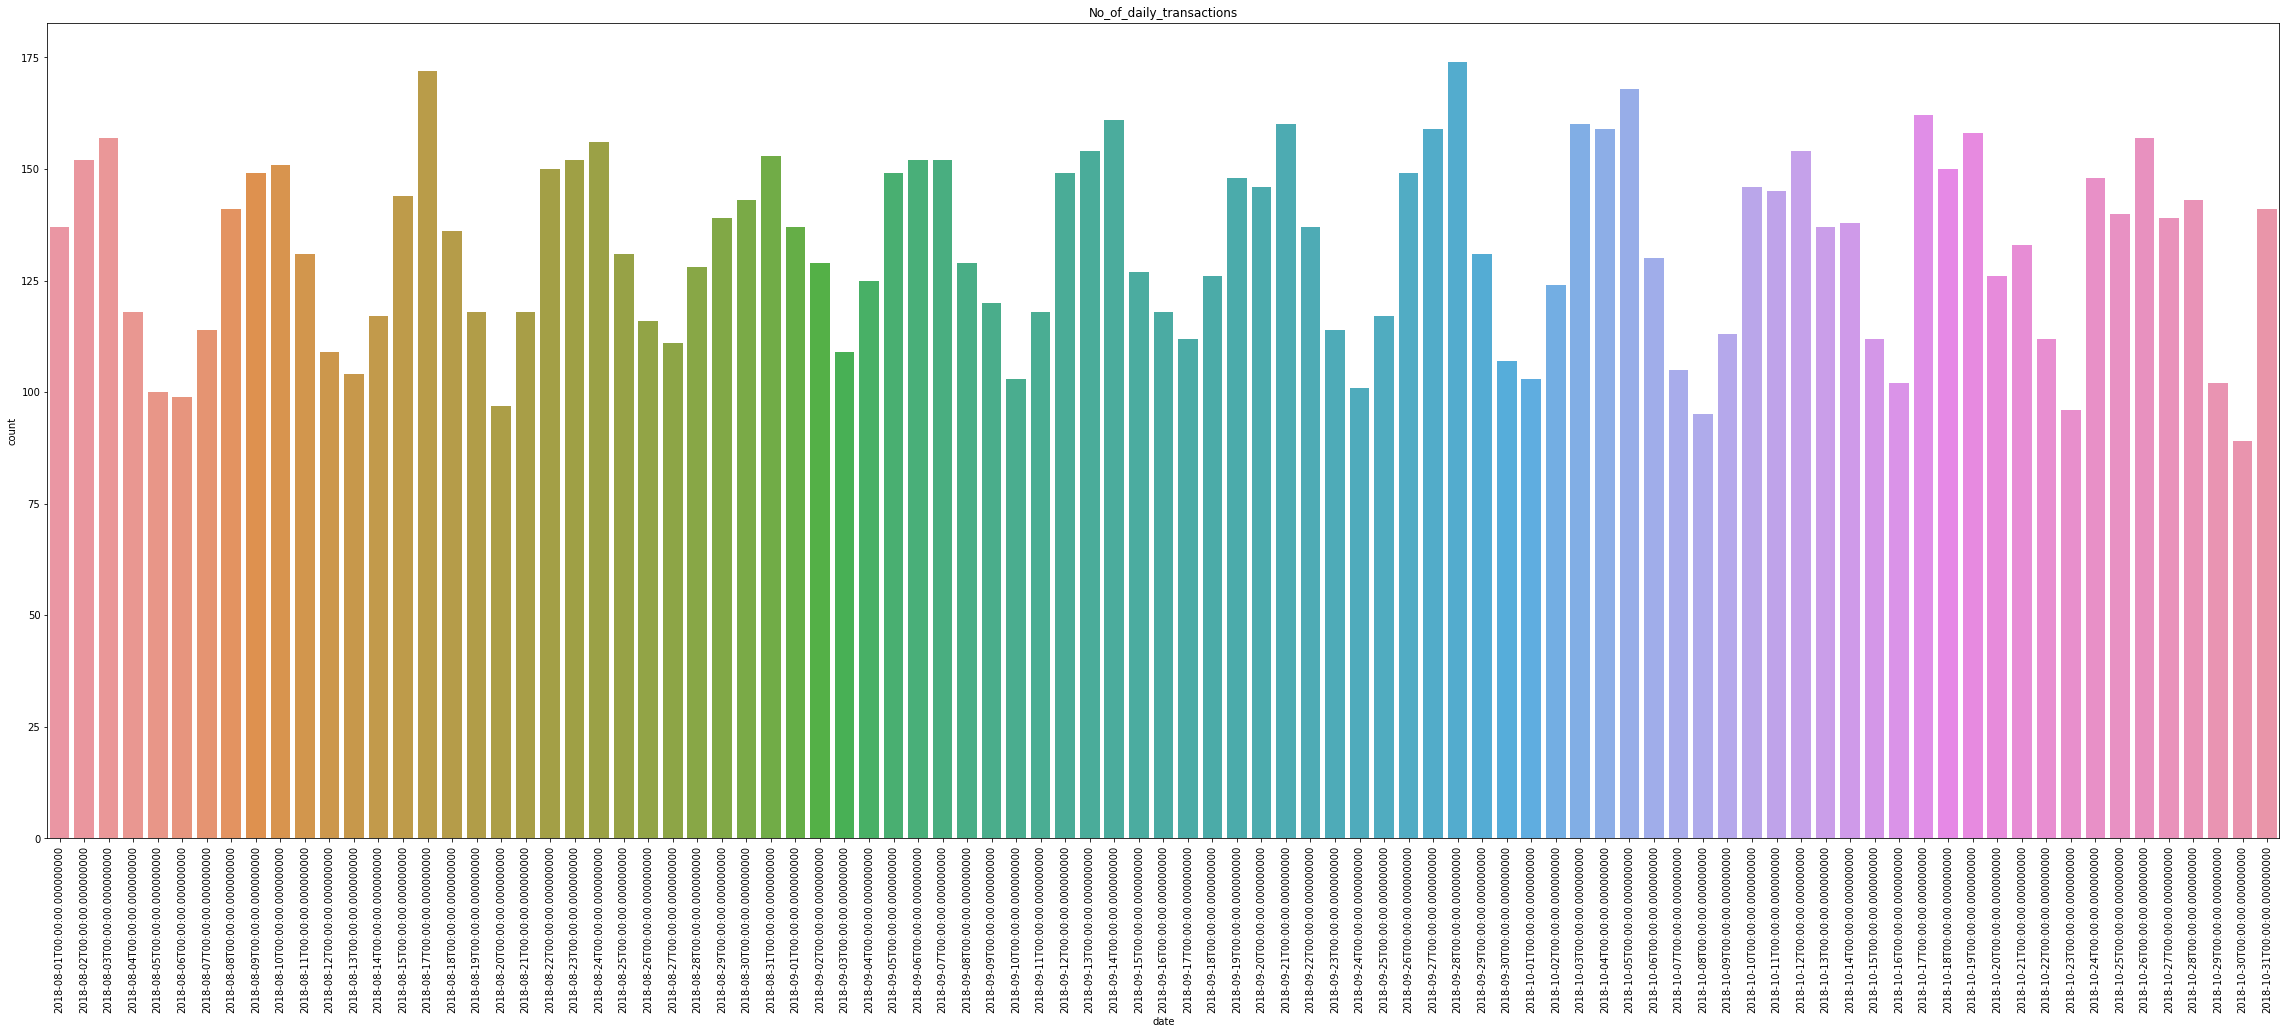

In [ ]:
plt.figure(figsize=(40,15))
sns.countplot(data = anz, x='date' ) 
plt.xticks(rotation=90)
plt.title('No_of_daily_transactions')
plt.show()

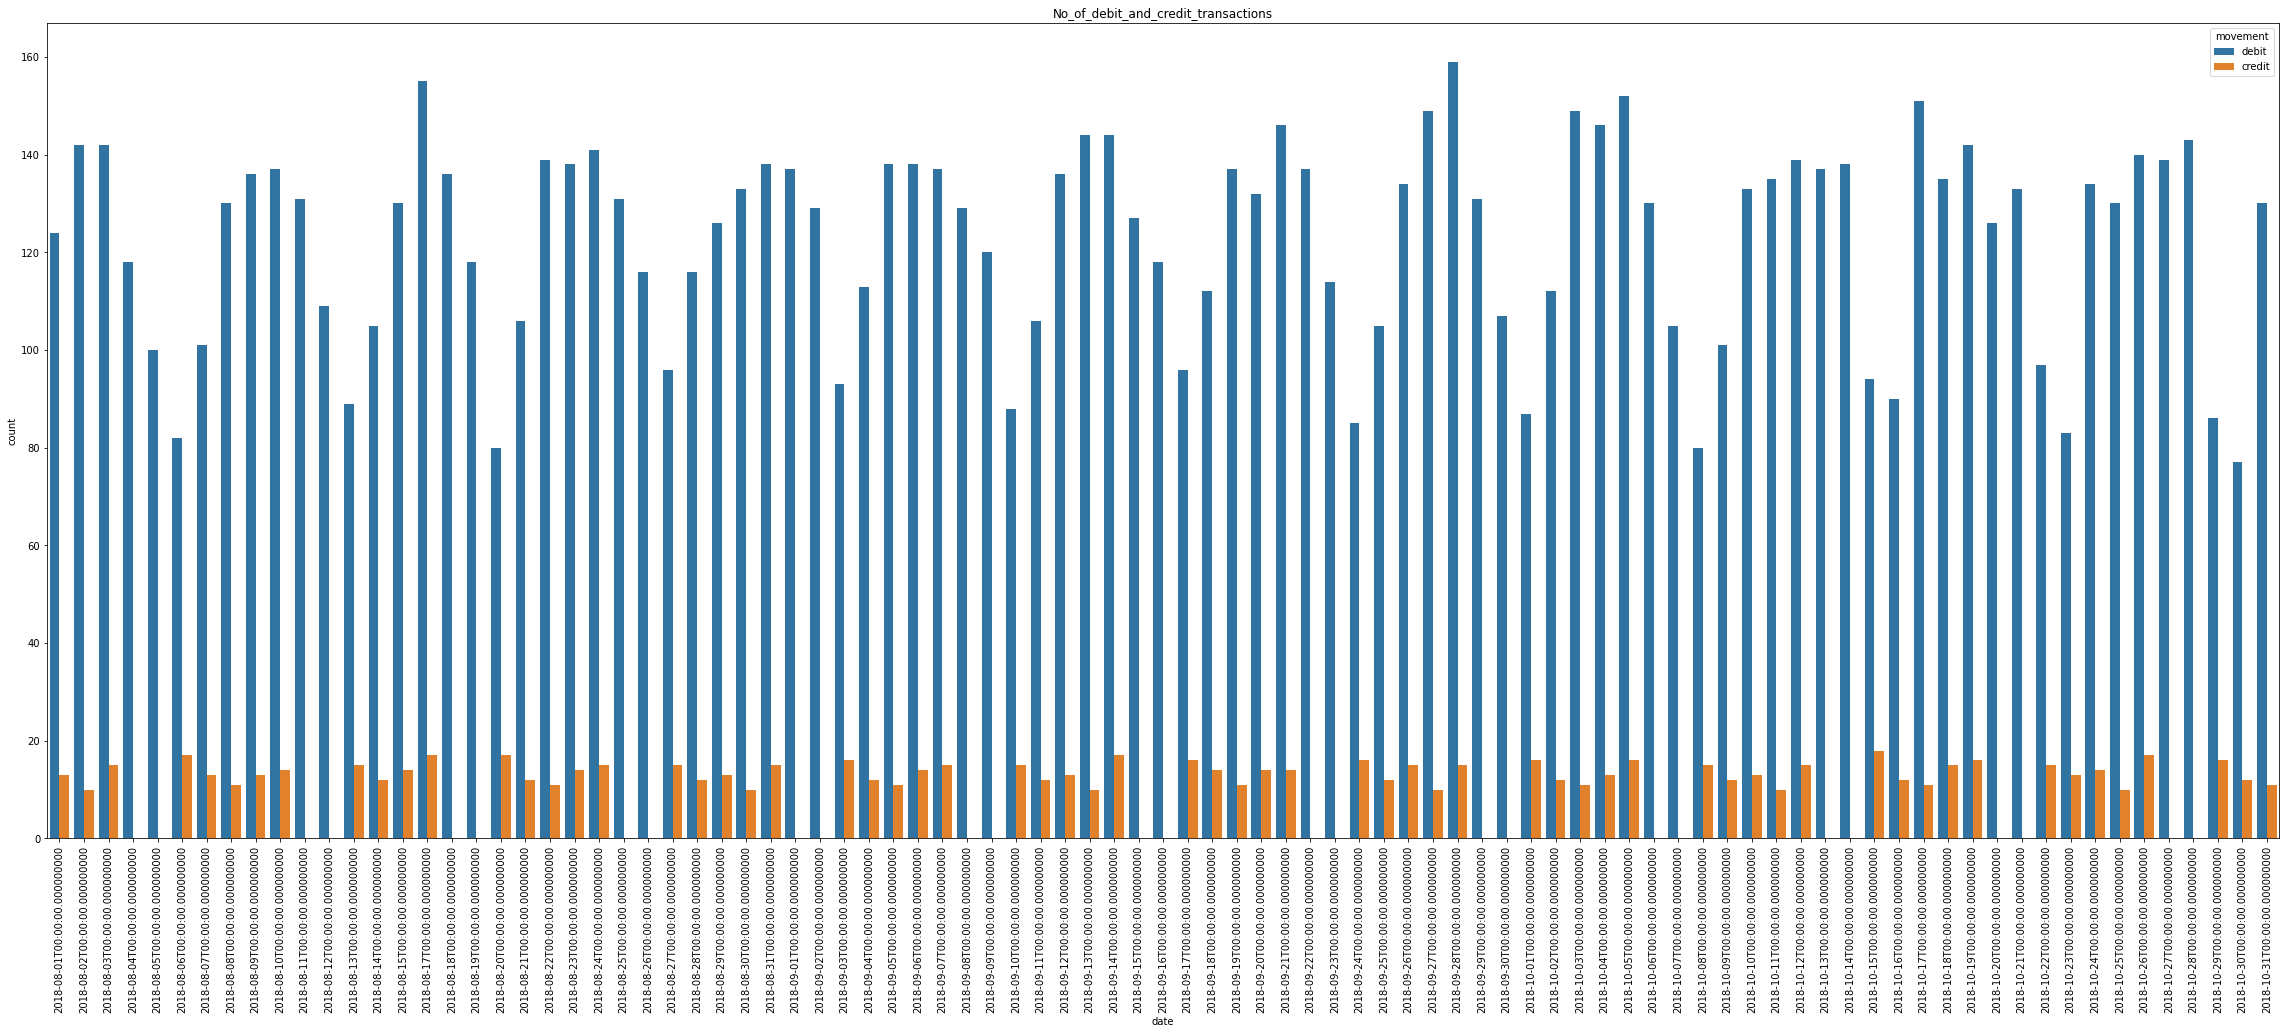

In [ ]:
plt.figure(figsize=(40,15))
sns.countplot(data = anz, x='date', hue='movement' ) 
plt.xticks(rotation=90)
plt.title('No_of_debit_and_credit_transactions')
plt.show()


In [ ]:
#average customer monthly trasaction
customer=anz.groupby('customer_id').amount.mean().to_frame().reset_index()
customer

,customer_id,amount
0,CUS-1005756958,222.862603
1,CUS-1117979751,339.843700
2,CUS-1140341822,212.632500
3,CUS-1147642491,245.600169
4,CUS-1196156254,147.145796
...,...,...
95,CUS-72755508,197.213276
96,CUS-809013380,151.694274
97,CUS-860700529,77.681888
98,CUS-880898248,146.954487


In [ ]:
fig=px.line(customer, x='customer_id', y='amount', title='average customer monthly transactions')
fig.show()

In [ ]:
groupby_date=anz.groupby('date')
for date, date_anz in groupby_date:
    print(date)
    print(date_anz)

Streaming output truncated to the last 5000 lines.
...             ...             ...                                   ...   
3375  115.78 -31.90         PAYMENT                                   NaN   
3376  144.66 -37.91         PAYMENT                                   NaN   
3377  149.19 -21.15         PAYMENT                                   NaN   
3378  144.89 -37.69         PAYMENT                                   NaN   
3379  153.10 -27.66       SALES-POS  8468fd72-60c4-45aa-a49c-4129f51bf0c7   

      merchant_code first_name  ...  merchant_state  \
3269            0.0    Kaitlyn  ...             NSW   
3270            0.0   Kimberly  ...             VIC   
3271            0.0       Eric  ...             NaN   
3272            0.0      Lucas  ...             NaN   
3273            0.0    Matthew  ...             NaN   
...             ...        ...  ...             ...   
3375            0.0    Antonio  ...             NaN   
3376            0.0      Cindy  ...           

In [ ]:
groupby_month=anz.groupby('month')
for month, month_anz in groupby_month:
    print(month)
    print(month_anz)

August
          status  card_present_flag bpay_biller_code         account currency  \
0     authorized                1.0                0  ACC-1598451071      AUD   
1     authorized                0.0                0  ACC-1598451071      AUD   
2     authorized                1.0                0  ACC-1222300524      AUD   
3     authorized                1.0                0  ACC-1037050564      AUD   
4     authorized                1.0                0  ACC-1598451071      AUD   
...          ...                ...              ...             ...      ...   
3938  authorized                1.0                0   ACC-588564840      AUD   
3939  authorized                1.0                0  ACC-2265520058      AUD   
3940  authorized                1.0                0  ACC-1903037542      AUD   
3941  authorized                1.0                0  ACC-2231965366      AUD   
3942  authorized                1.0                0  ACC-2270192619      AUD   

           long_lat 

In [ ]:
groupby_month.get_group('August')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,monthly
0,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,0.0,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,August,August
1,authorized,0.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,0.0,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,August,August
2,authorized,1.0,0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,0.0,Michael,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,August,August
3,authorized,1.0,0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,0.0,Rhonda,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,August,August
4,authorized,1.0,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,0.0,Diana,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,August,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,authorized,1.0,0,ACC-588564840,AUD,151.27 -33.76,SALES-POS,edadc46b-f158-4c81-a040-7f615aaf9c4d,0.0,Isaiah,...,NSW,2018-08-31T23:01:41.000+0000,21.86,4291ddcf81c54f5b9a420289f679f0a1,Australia,CUS-1462656821,151.01 -33.73,debit,August,August
3939,authorized,1.0,0,ACC-2265520058,AUD,151.27 -33.85,SALES-POS,6fcf2543-343c-497c-ab74-63660c75cac5,0.0,Catherine,...,NSW,2018-08-31T23:15:46.000+0000,43.57,cb130761591b4095b1fb922aba36ec48,Australia,CUS-331942311,151.27 -33.89,debit,August,August
3940,authorized,1.0,0,ACC-1903037542,AUD,153.05 -27.61,SALES-POS,9f3694c1-cdf2-4a95-9908-1e590194a552,0.0,Jeffrey,...,QLD,2018-08-31T23:29:51.000+0000,14.46,42f4afcfcf0d475aacb31c845ce67ad4,Australia,CUS-860700529,153.03 -27.39,debit,August,August
3941,authorized,1.0,0,ACC-2231965366,AUD,144.96 -37.84,POS,ad1404e0-42fe-4df6-ab2b-ed1b8fd73c1a,0.0,Linda,...,VIC,2018-08-31T23:43:56.000+0000,11.06,8fd0b5addc654dce9db7fd1b093e9604,Australia,CUS-2155701614,144.95 -37.82,debit,August,August


In [ ]:
anz['day']=anz['date'].dt.day_name()
anz['day']

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
12038    Wednesday
12039    Wednesday
12040    Wednesday
12041    Wednesday
12042    Wednesday
Name: day, Length: 12043, dtype: object

average amount of daily transaction

In [ ]:
#amount of transactions carried out daily
day=anz.groupby('day').amount.mean()
day=day.to_frame()
day

,amount
day,
Friday,249.353517
Monday,373.221000
Saturday,54.419286
Sunday,53.015845
Thursday,184.010422
Tuesday,221.576456
Wednesday,195.215570


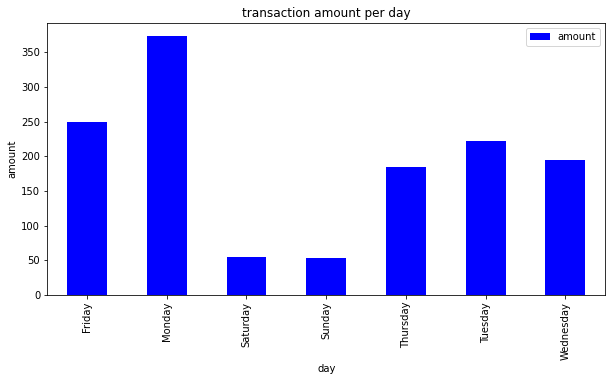

In [ ]:
#Transaction amount per day
day.plot(kind='bar',color='blue', xlabel= 'day', ylabel='amount', title='transaction amount per day', figsize=(10, 5))

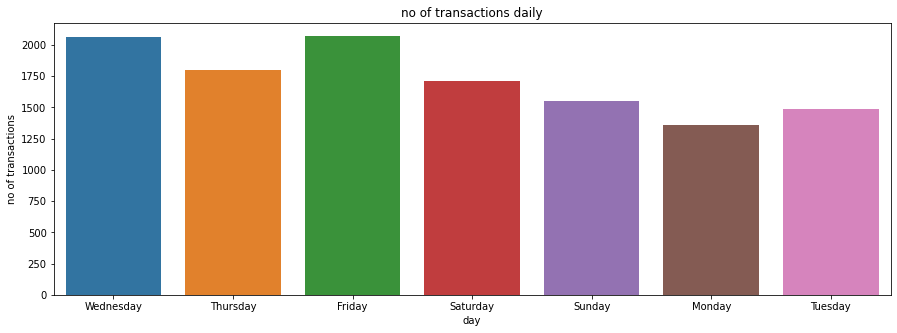

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = anz, x='day') 
plt.ylabel('no of transactions')
plt.title('no of transactions daily')
plt.show()

In [ ]:
anz['week']=anz['date'].dt.week
anz['week']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



0        31
1        31
2        31
3        31
4        31
         ..
12038    44
12039    44
12040    44
12041    44
12042    44
Name: week, Length: 12043, dtype: int64

In [ ]:
week=anz.groupby('week').amount.mean()
week

week
31    151.315346
32    191.737796
33    180.216372
34    189.795859
35    162.706660
36    194.403141
37    186.912108
38    198.120488
39    187.498859
40    179.005933
41    174.715065
42    217.294899
43    196.041241
44    248.730753
Name: amount, dtype: float64

In [ ]:
week=week.to_frame()
week

,amount
week,
31,151.315346
32,191.737796
33,180.216372
34,189.795859
35,162.706660
36,194.403141
37,186.912108
38,198.120488
39,187.498859


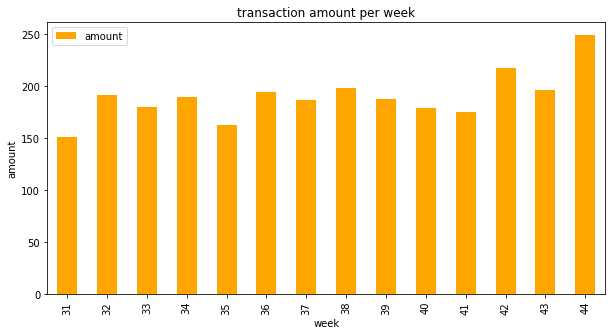

In [ ]:
#transaction amount per week
week.plot(kind='bar',color='orange', xlabel= 'week', ylabel='amount', title='transaction amount per week', figsize=(10, 5))

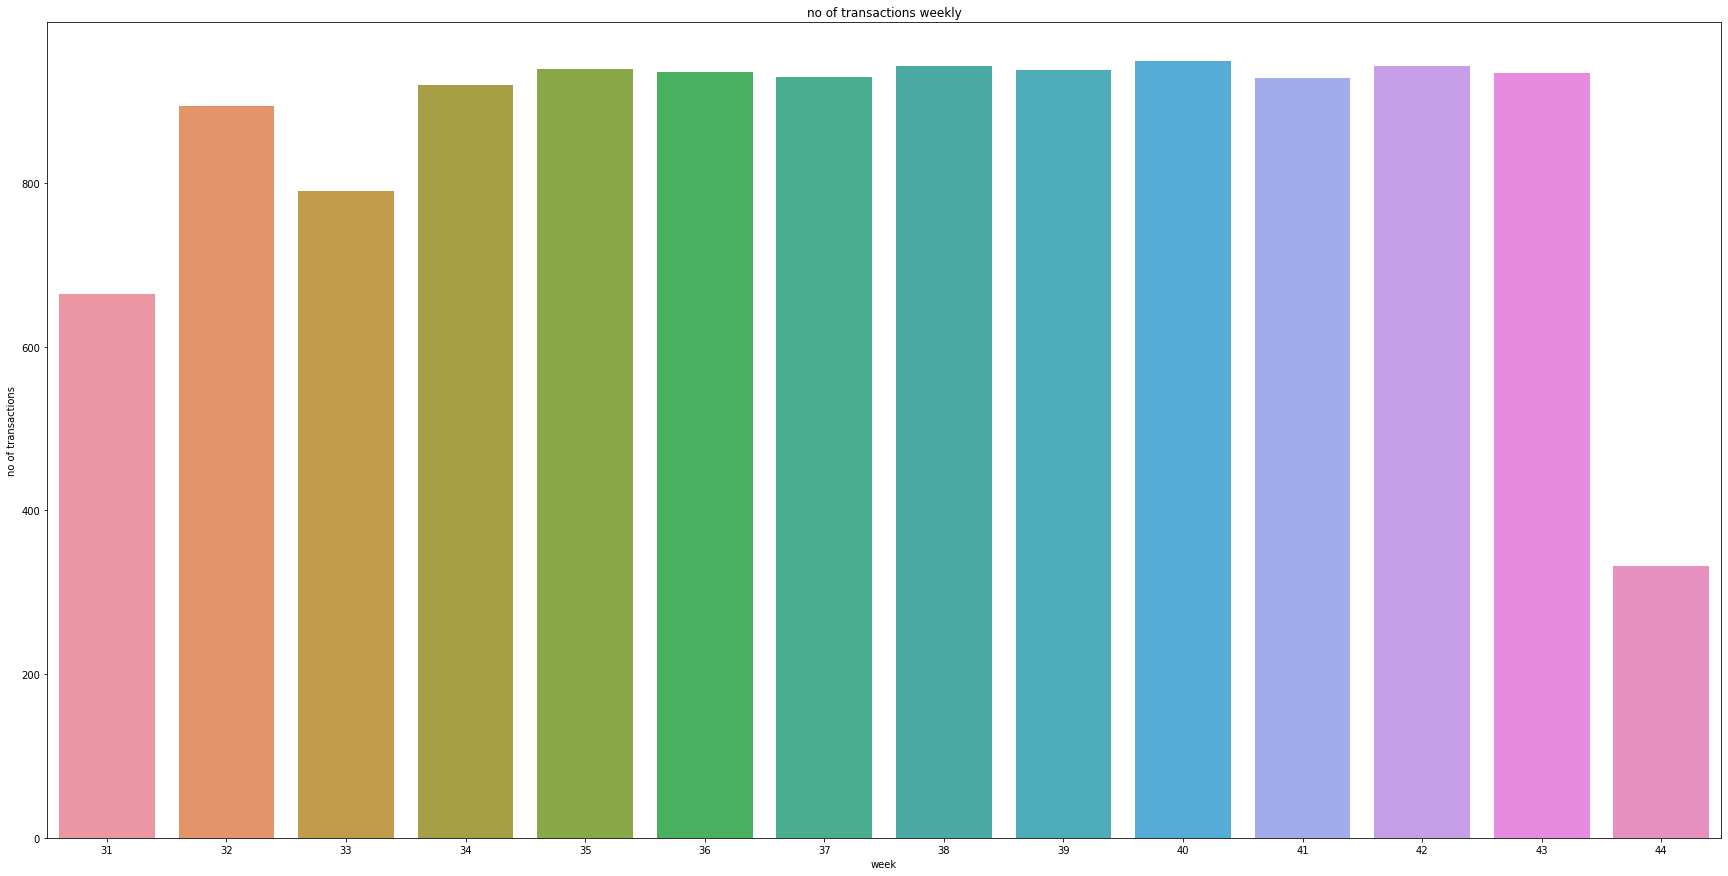

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(data = anz, x='week') 
plt.ylabel('no of transactions')
plt.title('no of transactions weekly')
plt.show()

In [ ]:
#checking for outliers
amount=anz['amount']
outliers= []
def detect_outliers_iqr(df):
  df=df.sort_values()
  Q1=np.percentile(df, 25)
  Q3=np.percentile(df, 75)
  IQR=Q3-Q1
  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)
  for i in df:
    if (i<lower_bound or i>upper_bound):
      outliers.append(i)
  return outliers
sample_outliers_size= detect_outliers_iqr(amount)
out1=pd.array(sample_outliers_size) 
out1

<FloatingArray>
[ 110.18,  110.25,   111.0,   111.0,   111.0,  111.29,   111.3,  111.34,
  111.37,  111.51,
 ...
 5103.51, 6024.49, 6024.49, 6107.23, 6107.23, 7081.09, 8835.98, 8835.98,
 8835.98, 8835.98]
Length: 1844, dtype: Float64

In [ ]:
#replacing the outliers with null values
anz['amount']= anz['amount'].replace(out1, np.nan)

In [ ]:
anz.isna().sum()

status                  0
card_present_flag       0
bpay_biller_code        0
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
merchant_code           0
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount               1844
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
month                   0
monthly                 0
day                     0
week                    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



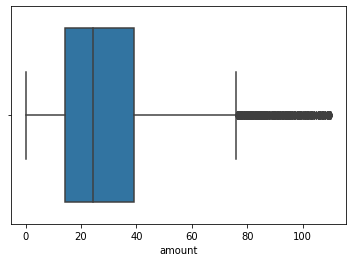

In [ ]:
sns.boxplot(anz['amount'])
plt.show()

In [ ]:
thresold=anz['amount'].quantile(0.95)
thresold

1158.15

In [ ]:
#taking my outliers from amount greater than 4000
anz[anz['amount']>4000]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
706,posted,NaN,0,ACC-240804743,AUD,121.48 -30.75,PAY/SALARY,NaN,0.0,Kenneth,...,29,NaN,NaN,2018-08-06T11:00:00.000+0000,4405.30,81643ac523fd46018a525723984c68c9,Australia,CUS-261674136,NaN,credit
708,posted,NaN,0,ACC-3879258709,AUD,143.83 -37.66,PAY/SALARY,NaN,0.0,Natasha,...,40,NaN,NaN,2018-08-06T11:00:00.000+0000,4216.04,dd10f0e6270548a8a7d38b1f5b3ed065,Australia,CUS-527400765,NaN,credit
807,posted,NaN,0,ACC-37709441,AUD,153.41 -28.01,PAY/SALARY,NaN,0.0,Charles,...,18,NaN,NaN,2018-08-07T11:00:00.000+0000,4132.23,9f00417dbb9a45cea772f8450136d614,Australia,CUS-3336454548,NaN,credit
833,posted,NaN,0,ACC-2673069055,AUD,152.99 -27.49,PAY/SALARY,NaN,0.0,Richard,...,24,NaN,NaN,2018-08-07T15:00:00.000+0000,6024.49,b2fedeaf02a6485ba4cf3be69b56a80b,Australia,CUS-51506836,NaN,credit
1636,posted,NaN,0,ACC-3827517394,AUD,151.12 -33.89,PAY/SALARY,NaN,0.0,Craig,...,28,NaN,NaN,2018-08-13T17:00:00.000+0000,4054.77,05f95c09b465486b8979293114ec6a8a,Australia,CUS-2663907001,NaN,credit
1858,posted,NaN,0,ACC-354106658,AUD,151.04 -33.80,PAY/SALARY,NaN,0.0,Christine,...,39,NaN,NaN,2018-08-15T15:00:00.000+0000,5103.51,41ce67e6c8a4474385fd1646963b6758,Australia,CUS-2376382098,NaN,credit
2391,posted,NaN,0,ACC-240804743,AUD,121.48 -30.75,PAY/SALARY,NaN,0.0,Kenneth,...,29,NaN,NaN,2018-08-20T11:00:00.000+0000,4405.30,b309ae70aef54c3bbf6637813026ba1f,Australia,CUS-261674136,NaN,credit
2393,posted,NaN,0,ACC-3879258709,AUD,143.83 -37.66,PAY/SALARY,NaN,0.0,Natasha,...,40,NaN,NaN,2018-08-20T11:00:00.000+0000,4216.04,665d404d53dd4601bde0b14eb01d6135,Australia,CUS-527400765,NaN,credit
2401,posted,NaN,0,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,0.0,Tim,...,40,NaN,NaN,2018-08-20T13:00:00.000+0000,8835.98,b608ce5142664a79af4fa071a886c8f7,Australia,CUS-1816693151,NaN,credit
2496,posted,NaN,0,ACC-37709441,AUD,153.41 -28.01,PAY/SALARY,NaN,0.0,Charles,...,18,NaN,NaN,2018-08-21T11:00:00.000+0000,4132.23,38978fa0f10f4213aa6b51c1fb119e7d,Australia,CUS-3336454548,NaN,credit


In [ ]:
new_anz=anz[(anz['amount']<4000)]
new_anz

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [ ]:
#there is a diffrence of 20 in the average mean amount with and without outliers
print('the new average amount after dropping outliers')
print(new_anz['amount'].mean())

the new average amount after dropping outliers
169.18958152717573
